![Alura <](img/logo-alura.svg)
<br><br>
    
## Estatística com Python parte 1: Frequências e Medidas

- Nível: Básico 
- Aluno: Paulo Freitas Nobrega 
- Professor: Rodrigo Fernando Dias 
- Link do curso: https://cursos.alura.com.br/course/estatistica-distribuicoes-e-medidas
<br><br>

##### Dataset: Pesquisa Nacional por Amostra de Domicílios (PNAD) 2015
> O sistema de pesquisas domiciliares, implantado progressivamente no Brasil a partir de 1967, com a criação da **Pesquisa Nacional por Amostra de Domicílios - PNAD**, produz informações básicas para o estudo do desenvolvimento socioeconômico do País.

##### Dataset: Boletins
> Pequeno conjunto de dados para auxiliar a aula. Contitui-se de variáveis do tipo quantitativa (numérica) contínua.

<br>

### Aula 03: Medidas de Tendência Central
Variáveis com dados de medição ou contagem podem possuir milhares de valores diferentes. Um passo fundamental na exploração de seus dados é definir um "valor típico" para cada feature (variável): uma estimativa de onde a maioria dos dados está localiada. Ou seja, sua tendência central.

---
BRUCE, Peter. **Estatística Prática para Cientistas de Dados**: 50 Conceitos Essenciais. 1. ed. p. 9. Rio de Janeiro: Alta Books, 2019.

### Fórmulas e conceitos estatísticos para esta aula.

Outliers: Valor que seja muito distante dos valores em um conjunto de dados.

$n$ = Número de elementos da amostra/população

$\bar x$ = Média, onde: $\bar x=\frac{\sum_{i}^n x_i}{n}$

$md$ = Mediana, onde $n$ é `ímpar`: $md=x_{\frac{n+1}{2}}$

$md$ = Mediana, onde $n$ é `par`: <br>
$md=\Large{\frac{x_{\frac{n}{2}} + x_{\frac{n+1}{2}}}{2}}$

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as misc
import matplotlib.pyplot as plt

# Aplicando Estilo Matplotlib
plt.style.use('seaborn')

# Importando Dataset PNAD
df_pnad = pd.read_csv('dados.csv')

# Importando Dataset Boletins
df_boletins = pd.read_csv('dados_boletins.csv', index_col='Matérias')

In [2]:
# Exibindo dados do Dataset PNAD
df_pnad.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [3]:
# Exibindo dados do Dataset Boletins
df_boletins.head()

,Fulano,Beltrano,Sicrano
Matérias,,,
Matemática,8,10.0,7.5
Português,10,0.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
Histório,6,3.0,8.0


### Média

A média aritimética, ou simplesmente média, é a medida de tendência central mais conhecida e utilizada para resumir a informação contida em um conjunto de dados. Trata-se da soma de todos os valores, dividido pelo número de elementos.

> Em uma **amostra da população** utiliza-se o símbolo $\bar x$ (x barra) para representar a média e $n$ (minúsculo) para se referir ao número total de elementos. Tratando-se da **população**, utiliza-se os símbolos $\mu$ e $N$ (maiúsculo) respectivamente.

> Média é uma medida susetível aos efeitos de `outliers` (casos extremos). Alternativas para média aritimética são: **média aparada**, **média ponderada**, etc. 

Média da População: $\mu=\frac{\sum_{i}^N x_i}{N}$

Média da Amostra: $\bar x=\frac{\sum_{i}^n x_i}{n}$

---
BRUCE, Peter. **Estatística Prática para Cientistas de Dados**: 50 Conceitos Essenciais. 1. ed. p. 9, 10. Rio de Janeiro: Alta Books, 2019.

VIEIRA, Sonia. **Estatística básica**. 2 ed. p. 43. São Paulo: CENGAGE, 2018.

In [4]:
# Média do boletim de Fulano
nota_media = df_boletins['Fulano'].mean()
print('Nota Média: {}'.format(round(nota_media, 2)))

Nota Média: 7.71


In [5]:
# Média de renda PNAD
renda_media = df_pnad['Renda'].mean()
print('Renda Média: {}'.format(round(renda_media, 2)))

Renda Média: 2000.38


In [6]:
# Média de renda por sexo PNAD
# Dicionário de Sexo
indices_sexo = {
    0: 'Masculino',
    1: 'Feminino'
}

# Médias das features por sexo
media_sexo = df_pnad.groupby(['Sexo']).mean()

# Renomeacao de indices
media_sexo.rename(index=indices_sexo, inplace=True)
pd.DataFrame(media_sexo['Renda'].apply(lambda x: round(x, 2)))

,Renda
Sexo,
Masculino,2192.44
Feminino,1566.85


In [7]:
# Criando uma função média
def media(conjunto: list) -> float:
    """Cálcula a média de um conjunto de dados"""
    n = len(conjunto)
    somatorio = sum(conjunto)
        
    return somatorio/n

media([1, 2, 3, 4, 5, 6, 7, 8, 9])

5.0

##### Média Aparada

A média aparada é considerada uma estimativa robusta e utilizada para evitar a influência de outliers. Por exemplo, aparar os 10% iniciais e finais (uma escolha comum) dos dados oferecerá, quase sempre, uma proteção contra outliers, exceto nos conjuntos de dados menores. A média aparada pode ser vista como um meio-termo entre a mediana e a média: é robusta com valores extremos nos dados, mas usa mais dados para calcular a estimativa de localização.

Média Ponderada da Amostra: $\Large{\bar x=\frac{\sum_{i=p}^{n-p} + 1^{x_i}}{n-2p}}$ Onde $p$ = valores omitidos.

---
BRUCE, Peter. **Estatística Prática para Cientistas de Dados**: 50 Conceitos Essenciais. 1. ed. p. 12, 10. Rio de Janeiro: Alta Books, 2019.

In [8]:
# Criando a fução média aparada
def media_aparada(conjunto: list, proporcao_corte: float=0) -> float:
    """Cálcula a média aparada de um conjunto de dados"""
    c = sorted(conjunto)
    corte = round(proporcao_corte*10)
    
    if (corte*2) >= len(c)-1:
        raise ValueError("Proportion too big.")
    elif corte:
        del(c[:corte])
        del(c[-corte:]) 
    return sum(c)/len(c)

# Exemplo simulando outliers
conjunto = [1, 2, 3, 4, 5, 0, 450, 6, 7, 8, 9]
media_n = media(conjunto)
media_a = media_aparada(conjunto, 0.1)

print('Média: {}'.format(media_n))
print('Média Aparada: {}'.format(media_a))

Média: 45.0
Média Aparada: 5.0


In [9]:
# Média aparada com Scipy
misc.stats.trim_mean([1, 2, 3, 4, 5, 0, 450, 6, 7, 8, 9], 0.1)

5.0

### Mediana

A mediana é o número central em uma lista de dados classificada. Se houver um número par de valores de dados (n), o valor central é aquele que não está realmente no conjunto de dados, mas sim a média aritimética dos dois valores que dividem os valores classificados nas metades superior e inferior. 

Mediana, onde $n$ é `ímpar`: $md=x_{\frac{n+1}{2}}$

Mediana, onde $n$ é `par`: <br>
$md=\Large{\frac{x_{\frac{n}{2}} + x_{\frac{n+1}{2}}}{2}}$

---
BRUCE, Peter. **Estatística Prática para Cientistas de Dados**: 50 Conceitos Essenciais. 1. ed. p. 11. Rio de Janeiro: Alta Books, 2019.

In [10]:
# Boletim de fulano ordenado
boletim_fulano = df_boletins['Fulano'].sort_values()
pd.DataFrame(boletim_fulano)

,Fulano
Matérias,
Inglês,4
Histório,6
Matemática,8
Geografia,8
Química,8
Português,10
Física,10


In [11]:
# n do boletim de fulano
n = boletim_fulano.shape[0]
print('n = {}'.format(n))

n = 7


In [12]:
# Mediana de fulano
mediana_fulano = boletim_fulano.median()
print('Mediana de Fulano = {}'.format(mediana_fulano))

Mediana de Fulano = 8.0


In [13]:
# Simulando conjunto com n par
boletim_beltrano = df_boletins['Beltrano'].sample(6, random_state=101)
pd.DataFrame(boletim_beltrano.sort_values())

,Beltrano
Matérias,
Português,0.0
Inglês,0.5
Histório,3.0
Física,9.5
Matemática,10.0
Química,10.0


In [14]:
# Mediana de beltrano
mediana_beltrano = boletim_beltrano.median()
print('Mediana de Beltrano = {}'.format(mediana_beltrano))

Mediana de Beltrano = 6.25


In [15]:
# Criando uma função mediana
# Função auxiliar para verificar a imparidade de n
def imparidade(n: int) -> bool:
    """Verifica imparidade de n"""
    return n % 2 > 0


# Função mediana
def mediana(conjunto: list) -> float:
    """Cálcula a mediana de um conjunto de dados"""    
    c, n = sorted(conjunto), len(conjunto)
    meio = n//2
    md = c[meio] if imparidade(n) else (c[meio-1] + c[meio]) / 2
    
    return float(md)

In [16]:
# Conjuntos
conjunto_impar = [1, 2, 3, 4, 5]
conjunto_par = [1, 2, 3, 4, 5, 6]

# Medianas
print('Conjunto Par: {}'.format(mediana(conjunto_par)))
print('Conjunto Ímpar: {}'.format(mediana(conjunto_impar)))

Conjunto Par: 3.5
Conjunto Ímpar: 3.0


In [17]:
# Simulando Outliers
conjunto_outliers = [1, 2, 3, 4, 5, 150]

# Efeito de outliers no centro do conjunto
print('Média = {}'.format(media(conjunto_outliers)))
print('Média Aparada = {}'.format(media_aparada(conjunto_outliers, 0.1)))
print('Mediana = {}'.format(mediana(conjunto_outliers)))

Média = 27.5
Média Aparada = 3.5
Mediana = 3.5


### Moda

A moda é o valor que ocorre com maior frequência. Em relação a moda, um conjunto de dados pode ser:

- `amodal`: Não ter moda
- `unimodal`: Possuir uma moda
- `bimodal`: Possuir duas modas
- `multimodal`: Possuir várias modas (acima de duas)

A moda também pode ser usada para descrever dados qualitativos. Neste caso, a moda é a *categoria* que ocorre com maior frequência, ou seja, a categoria que contem a maior quantidade de dados.

---
VIEIRA, Sonia. **Estatística básica**. 2 ed. p. 50, 51. São Paulo: CENGAGE, 2018.

In [18]:
# Moda do fulano
df_boletins['Fulano'].mode()

0    8
dtype: int64

In [19]:
# Moda de renda PNAD
df_pnad['Renda'].mode()

0    788
dtype: int64

In [20]:
# Criando uma função moda
from collections import Counter

def moda(conjunto: list) -> float:
    """Encontra a(s) moda(s) de um conjunto de dados"""
    counts = Counter(conjunto)
    max_count = max(counts.values())
    
    return ([x for x in counts.keys() 
             if counts[x] == max_count], max_count)

moda(df_boletins['Fulano'].values)

([8], 3)

In [21]:
# Moda com Scipy
misc.stats.mode(df_boletins['Fulano'].values)

ModeResult(mode=array([8], dtype=int64), count=array([3]))

### Relação entre medidas de tendência central 

Em dados de comportamento `Simétrico`, ambas medidas possuem tendência de estarem próximas ou serem iguais. Neste caso entende-se `Moda = Mediana = Média`. Já em dados `Assimétricos à Direita` (assimetria positiva), os valores mais baixos são os mais frequentes, e a longa cauda à direita puxa a média em sua direção. Neste caso entende-se `Moda < Mediana < Média`. Por fim, em dados `Assimétricos à Esquerda` (assimetria negativa), os valores mais altos são os mais frequentes, e a média é puxada para a direção oposta. Neste caso entende-se `Moda > Mediana > Média`.
<br><br>

![Alura <](img/0001.jpg)

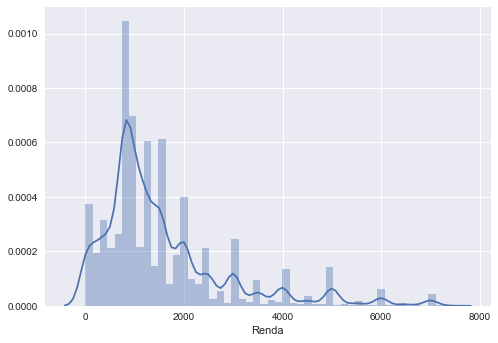

In [23]:
# Curva de renda PNAD
sns.distplot(df_pnad.query('Renda < 7500')['Renda']);

In [31]:
# Relação entre medidas de tendência central renda PNAD
renda = df_pnad['Renda']
moda_renda = renda.mode()[0]
media_renda = renda.mean()
mediana_renda = renda.median()

# Exibindo valores
print('Moda: {}, Média: {}, Mediana: {}'.format(moda_renda,
                                               media_renda,
                                               mediana_renda))

# Curva assimétrica a direita?
assimetrica_direita = moda_renda < mediana_renda < media_renda
print('Assimétrica Direita: {}'.format(assimetrica_direita))

Moda: 788, Média: 2000.3831988547631, Mediana: 1200.0
Assimétrica Direita: True


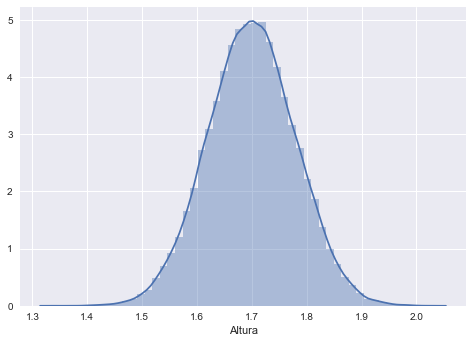

In [32]:
# Curva de altura PNAD
sns.distplot(df_pnad['Altura']);

In [35]:
# Relação entre medidas de tendência central renda PNAD
altura = df_pnad['Altura']
moda_altura = altura.mode()
media_altura = altura.mean()
mediana_altura = altura.median()

# Exibindo valores
print('Moda: {}, Média: {}, Mediana: {}'.format(moda_altura,
                                               media_altura,
                                               mediana_altura))

Moda: 0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64, Média: 1.6995124540575741, Mediana: 1.6993247325
